## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

Initial setup and required libraries

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
from scipy import stats

Import data

In [6]:
df = pd.read_csv('data/human_body_temperature.csv')

# 1. Is the distribution of body temperatures normal?

Yes.  Visual inspection of histogram compared to the normal curve and skewness test confirm a normal distribution.

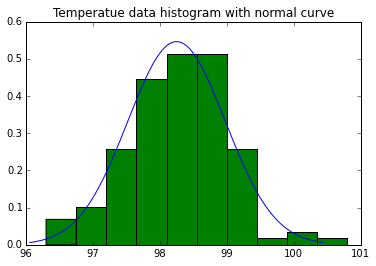

In [41]:
temps = df.temperature.values
mean = temps.mean()
std = temps.std()
range = np.arange(mean-3*std,mean+3*std, 0.01)
plt.plot(range,mlab.normpdf(range,mean,std))
plt.hist(temps,normed=True)
plt.title('Temperatue data histogram with normal curve')
plt.show()

In [54]:
z,p=stats.skewtest(temps)
print 'p-value for skewtest: ', p

p-value for skewtest:  0.982950112613


# 2. Is the true population mean really 98.6 degrees F?

No.  Using t-test because we don't know the true population mean.  
t-statistic is -5.45 so we reject null hypothesis that true mean = 98.6 
Can only use z-test if we know true mean and standard deviation.  

In [46]:
t, prob = stats.ttest_1samp(temps,98.6)
print 't-statistic: ', t
print 'Probability that 98.6 is true population mean: ', prob

t-statistic:  -5.45482329236
Probability that 98.6 is true population mean:  2.41063204156e-07


# 3. At what temperature should we consider someone's temperature to be "abnormal"?

Tempatures below 96.8 or above 99.7 are likely to be abnormal - that is, there is only a 5% change of falling outside that range.  

In [63]:
normalrange = stats.norm.interval(.95,loc=mean,scale=std)
normalrange

(96.817755826748225, 99.680705711713301)

# 4. Is there a significant difference between males and females in normal temperature?

There is not a significant difference between males and females in normal body tempature. 
We do a t-test for two independent samples, with a large p value we cannot reject null hypothesis that they have the same average temperatures.
We are assuming equal variance but the results are the same even if we do not.  

In [76]:
Mtemps = df[df.gender=='M'].temperature.values
Ftemps = df[df.gender=='F'].temperature.values
t,p=stats.ttest_ind(Mtemps,Ftemps)
print 'Two sample t-test p value: ', p

Two sample t-test p value:  0.793573622676


Looking at distributions graphically to confirm that this seems correct

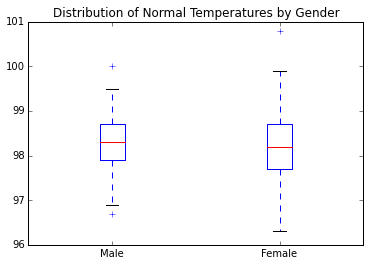

In [77]:
plt.boxplot([Mtemps,Ftemps],labels=['Male','Female'])
plt.title('Distribution of Normal Temperatures by Gender')
plt.show()